In [95]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
import os
from model.classifier import Classifier
from model.norm_classifier import PowClassifier
from model.torch_rbf import *
import matplotlib.pyplot as plt
import numpy as np

In [96]:
log_dir = "./log/norm2_2022_12_23_03_02_28_684754/" 
file_dir = log_dir + "55/"

In [97]:
layer_widths = [28*28, 10]
layer_centres = [20]
basis_func = linear
model = RBFClassifier(layer_widths, layer_centres, basis_func)                                                 # 调用模型Model
model.load_state_dict(torch.load(file_dir+"model_parameter.pkl"))    # 加载模型参数     

<All keys matched successfully>

In [98]:
print(model.rbf_layers[0].centres.shape)

torch.Size([20, 784])


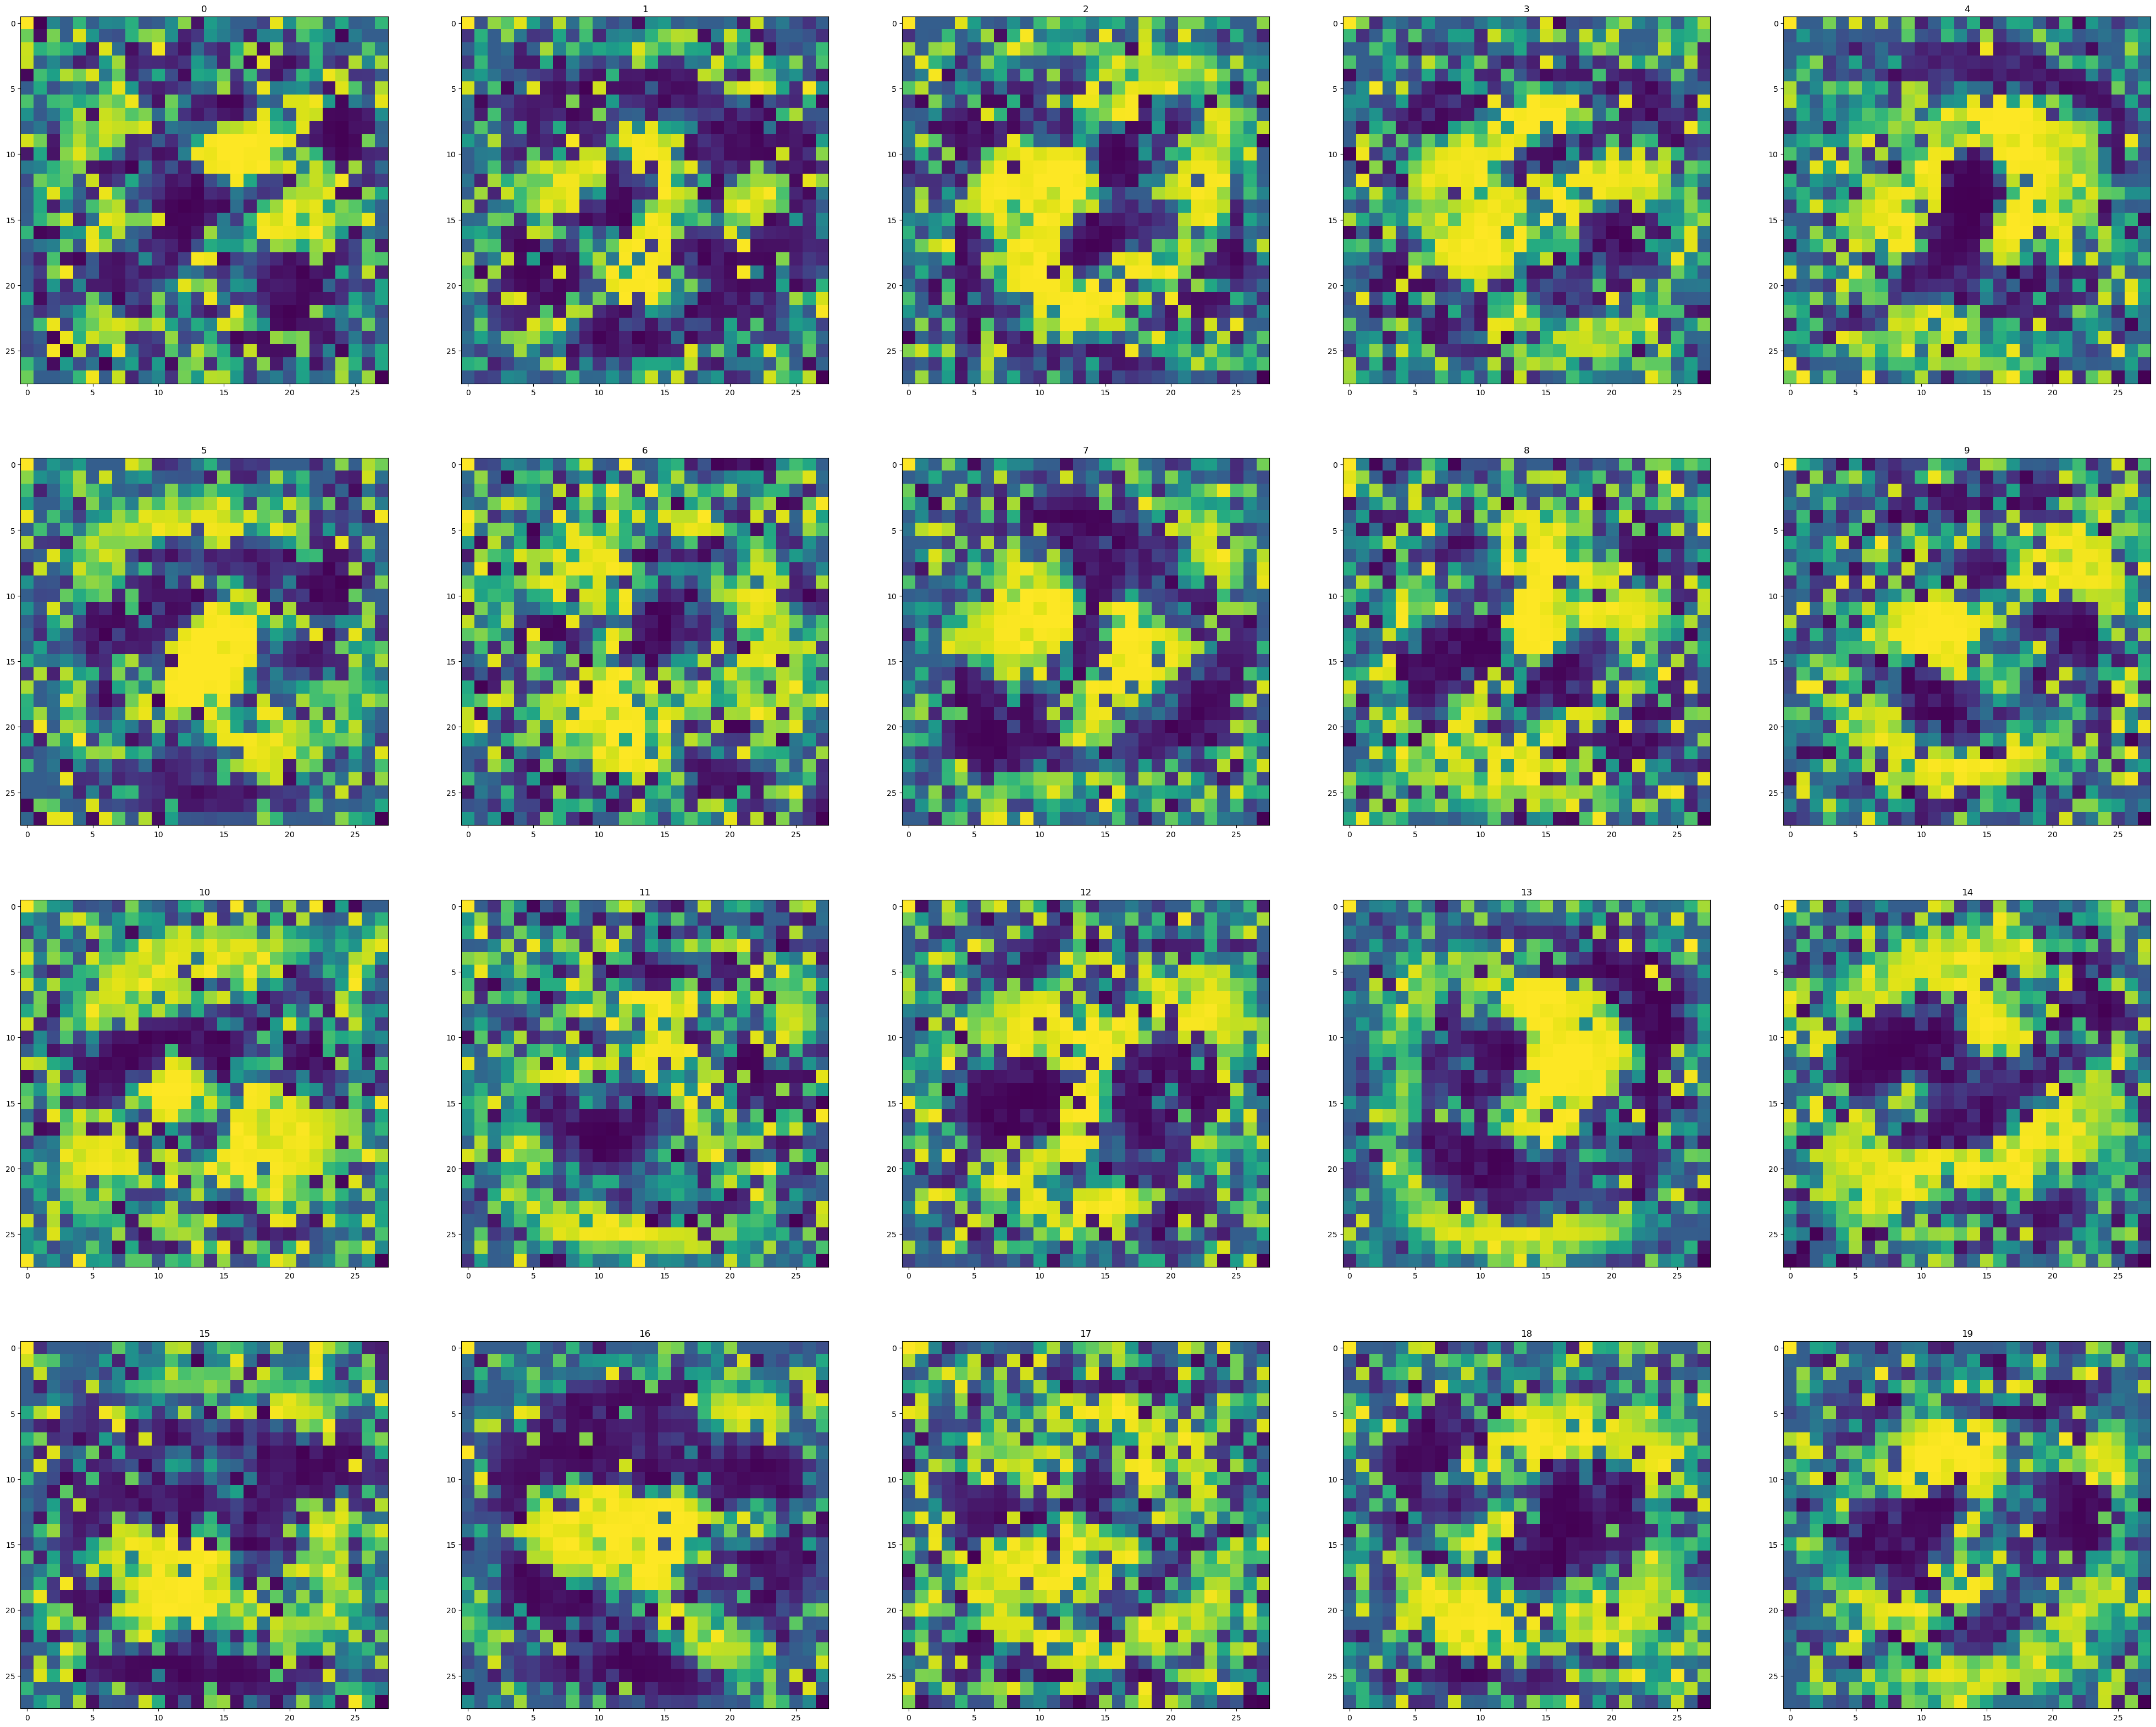

In [99]:
h = model.rbf_layers[0].centres.reshape(20, 28, 28).detach().numpy()
# b = model.b.detach().numpy()
fig, axes = plt.subplots(4, 5, figsize=(50, 40))

img = h

for i in range(4):
    for j in range(5):
        img[i*5+j, 0, 0] = np.max(img)
        img[i*5+j, 27, 27] = np.min(img)
        axes[i,j].imshow(np.tanh(img[i*5+j]), cmap='coolwarm')
        axes[i,j].set_title(str(i*5+j))